# Arctic Project in Penalized Linear Regression (Lasso)

## Import libraries

In [1]:
library(glmnet)
library(mice)

Loading required package: Matrix

Loaded glmnet 4.0-2


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




## Load data

In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)
x <- as.matrix(arctic[,c(6:12,15,16)])
y <- as.matrix(arctic[,c(5)])

## Lasso regression

In [3]:
r1 <- glmnet(x = x, y = y, family = "gaussian", alpha = 1)

## Coefficients variation plot

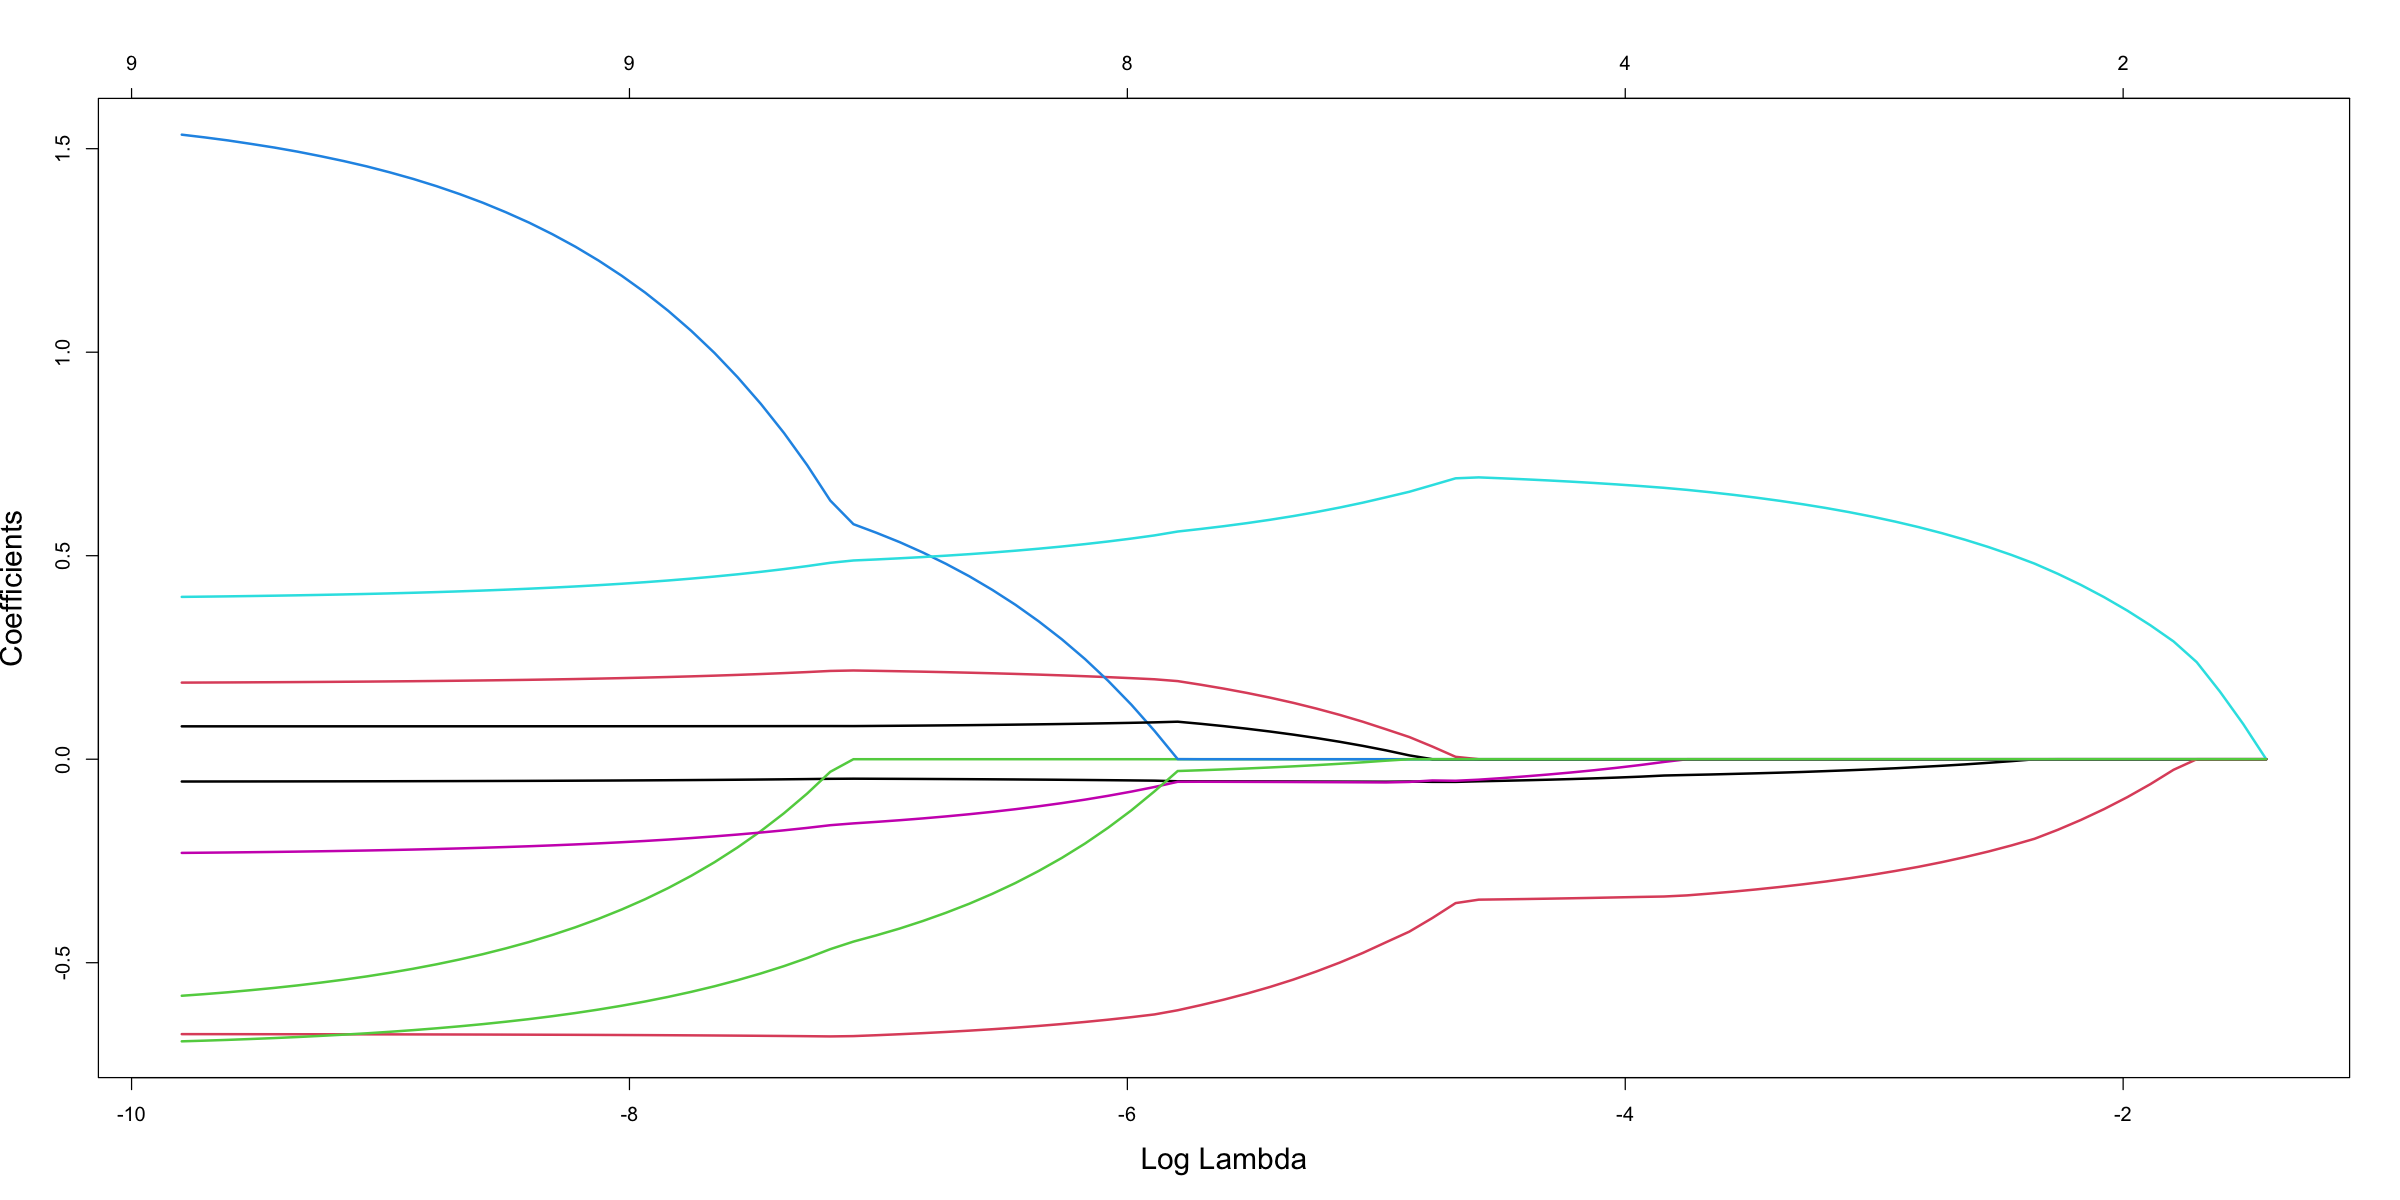

In [4]:
# figure size
options(repr.plot.width=20, repr.plot.height=10)

plot(r1, xvar="lambda", lwd = '2',cex.lab = 1.5)

## n-fold testing

In [6]:
rlcv <- cv.glmnet(x = x, y = y, family = "gaussian", alpha = 1, nfolds = 10)

## Log Lambda vs Testing Error

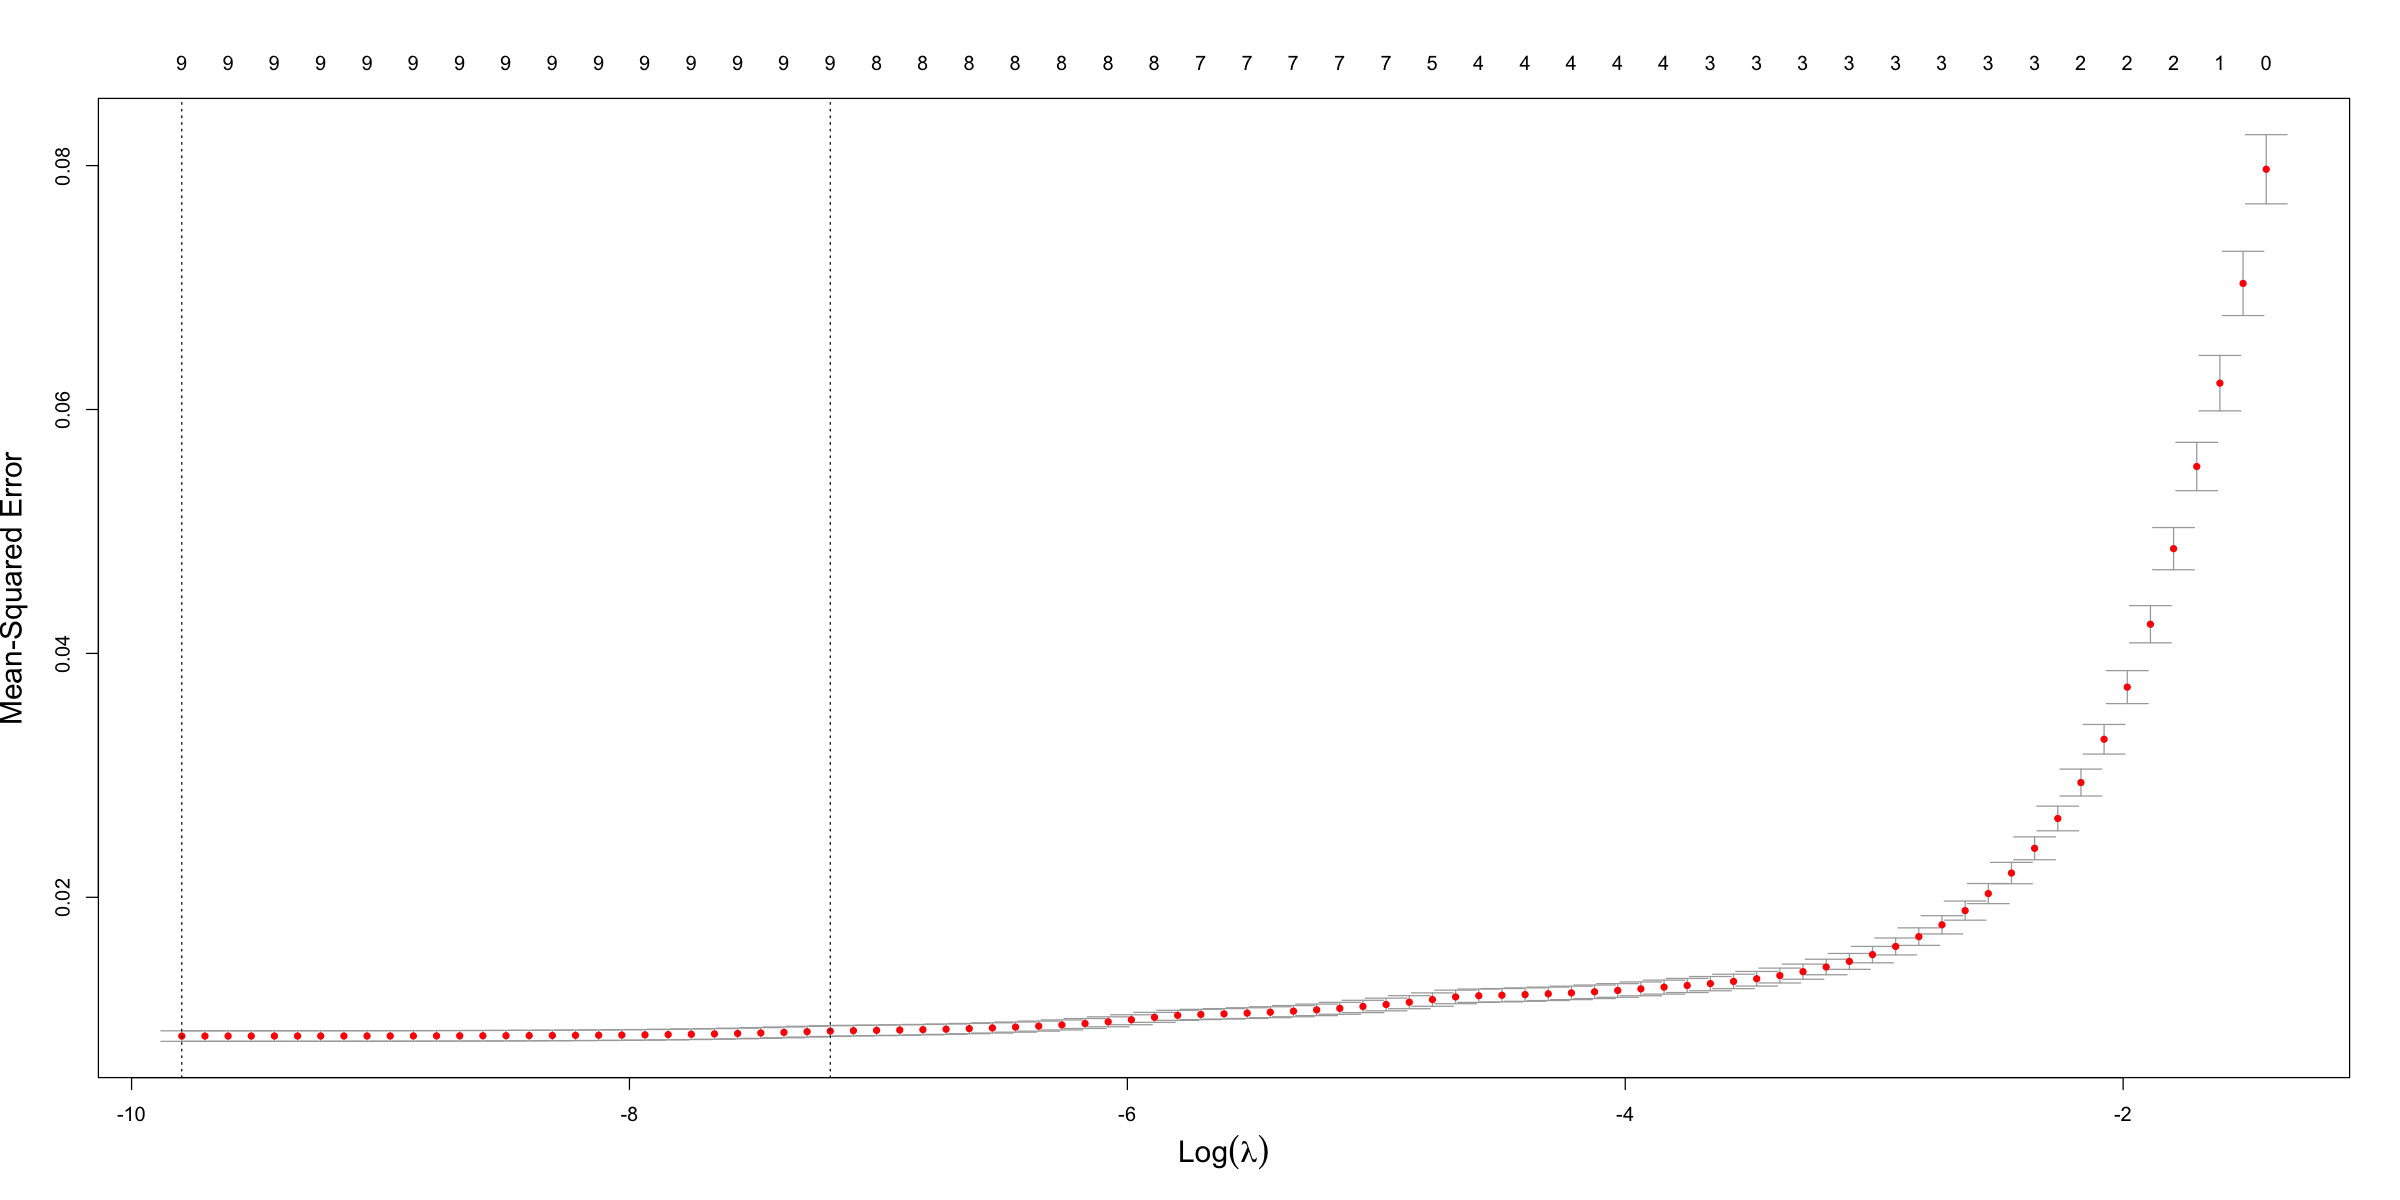

In [7]:
# figure size
options(repr.plot.width=20, repr.plot.height=10)

plot(rlcv,cex.lab = 1.5)

## Print value of "min" and "1se"

In [8]:
print(rlcv)


Call:  cv.glmnet(x = x, y = y, nfolds = 10, family = "gaussian", alpha = 1) 

Measure: Mean-Squared Error 

       Lambda  Measure        SE Nonzero
min 0.0000555 0.008619 0.0004309       9
1se 0.0007516 0.009029 0.0004394       9


## View coefficients 
### results can be different after each training since n-folds method above split data set randomly

In [9]:
coef(rlcv,s=rlcv$lambda.min)

# put optimum coefficients into model
rlcv_min <- glmnet(x = x, y = y, family = "gaussian", 
                   alpha = 1, lambda = rlcv$lambda.min)

# prediction and table merging
result <- as.data.frame(cbind(arctic[,c(1,5)],predict(rlcv_min,x)))

10 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                          0.69012445
Rainfall                            -0.05479965
Daylight                             0.18820598
Population                          -0.58118781
CO2                                  1.53446058
Ozone                                0.39882590
OceanTemperature_NorthernHemisphere -0.23017573
LandTemperature_NorthernHemisphere   0.08077646
MinTemperature_NorthSlopeAlaska     -0.67544172
GDP_WORLD                           -0.69314741

## Calculate Mean Square Error

In [10]:
result["R^2"] <- ((result$Area-result$s0)^2)
mse <- sum(result$"R^2")/490
print(mse)

[1] 0.008316298


## Plot line chart (Prediction vs True) with title, legend, and specific size of figure

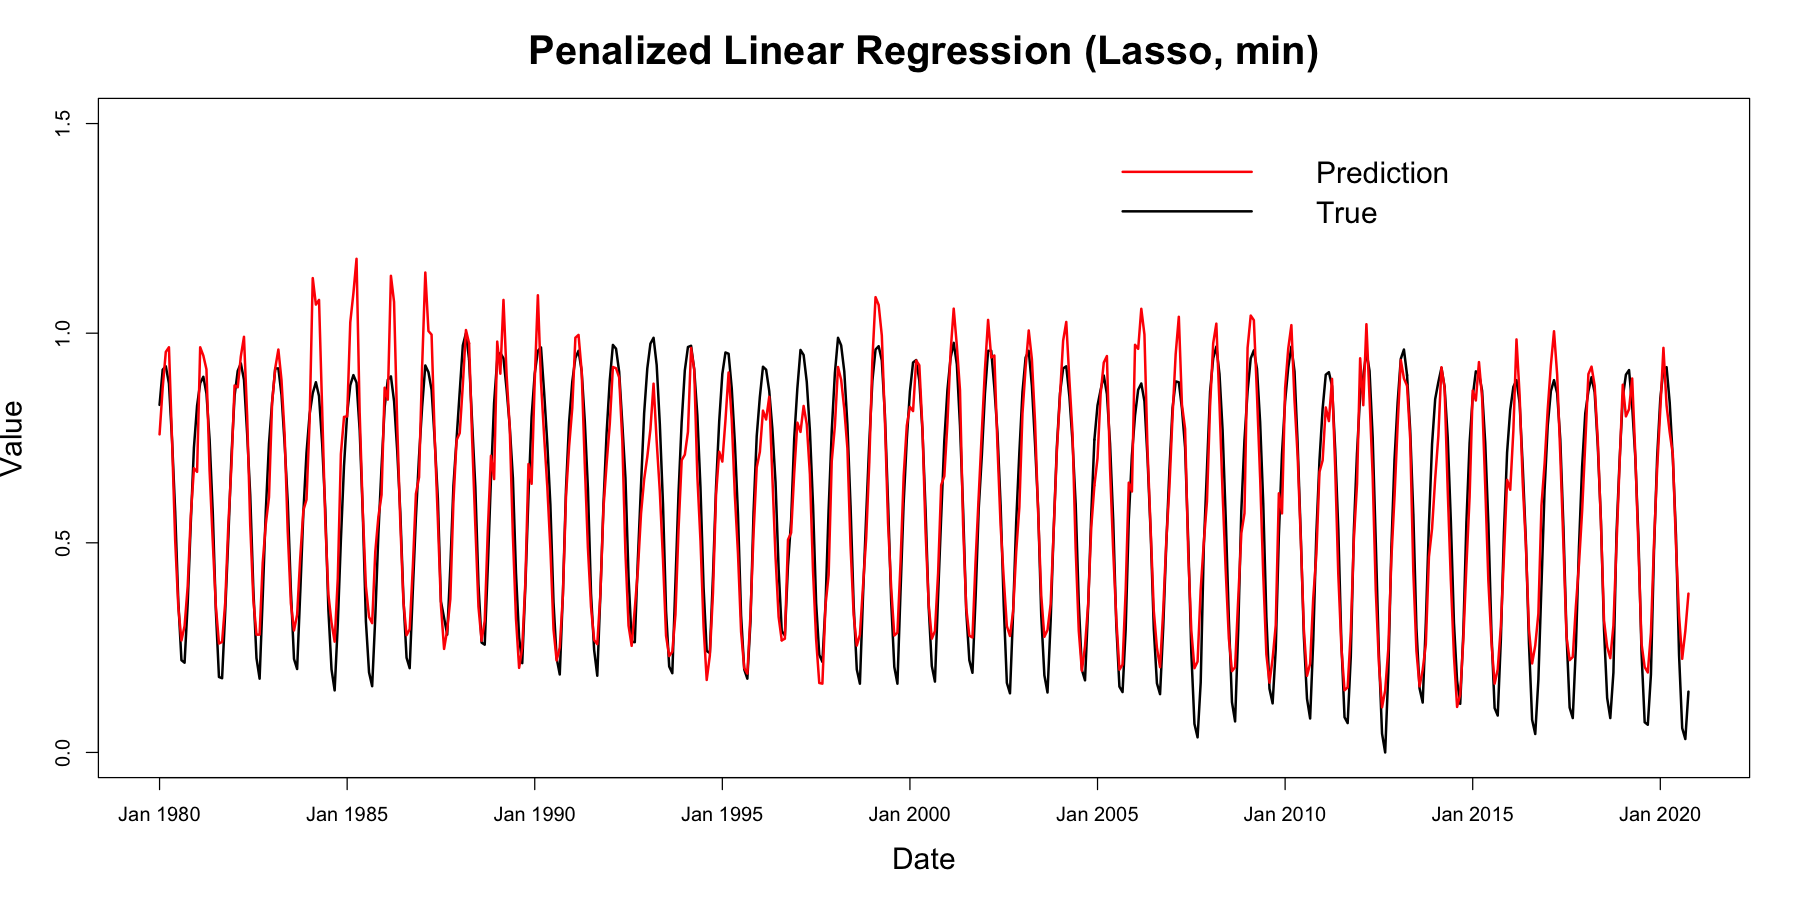

In [11]:
# figure size
options(repr.plot.width=15, repr.plot.height=7.5)

# plot
plot(result$observation,result$Area,type ='l',ylim = c(0,1.5),lwd = '2',
     xlab = "Date", ylab = "Value",xaxt='n',cex.lab = 1.5)

# attributes of prediction lines
lines(result$observation,result$s0,lty=1,col='red',lwd = '2')

# x-axis labels
axis(1,at=c(1,61,121,181,241,301,361,421,481),
   labels=c("Jan 1980","Jan 1985","Jan 1990","Jan 1995","Jan 2000","Jan 2005","Jan 2010","Jan 2015","Jan 2020"))

# title
title(main = list("Penalized Linear Regression (Lasso, min)", cex = 2, col = "black", font = 2))

# legend
legend("topright",inset=.05,c("Prediction","True"),
       bty = 'n',lty=c(1, 1),col=c("red", "black"),lwd =c(2, 2),cex = 1.5)

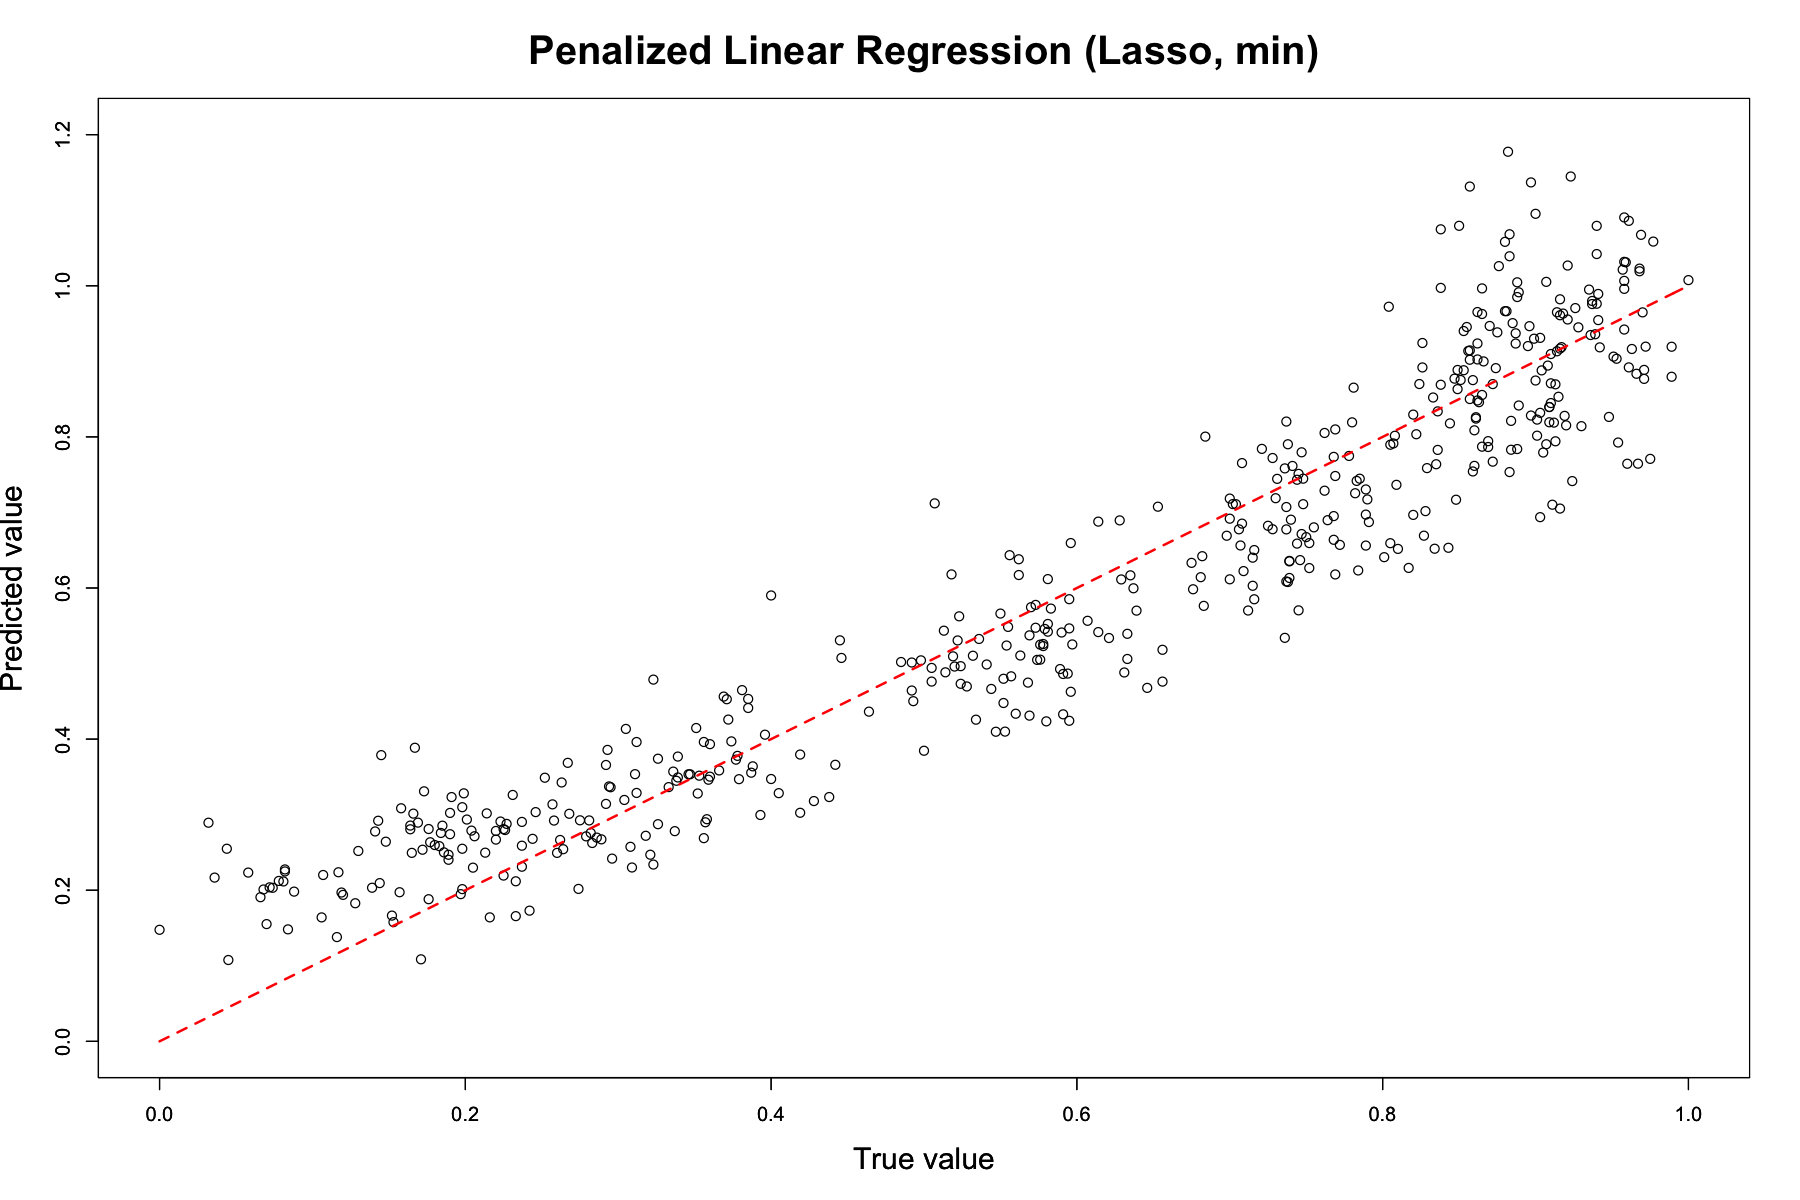

In [12]:
# figure size
options(repr.plot.width=15, repr.plot.height=10)

plot(result$Area, result$s0,xlim = c(0,1.0), ylim = c(0,1.2),
     xlab = "True value", ylab = "Predicted value",cex.lab = 1.5)
par(new = TRUE)
curve(x+0,0,1,bty="l",xlim = c(0,1.0), ylim = c(0,1.2),
      col=c("red"),lwd =c(2),lty=c(2),xlab = "True value", ylab = "Predicted value",cex.lab=1.5)
# title
title(main = list("Penalized Linear Regression (Lasso, min)", cex = 2, col = "black", font = 2))